In [56]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
# Define parameters
num_employees = 100  # Number of employees (size of 1D grid)
num_generations = 50  # Number of generations (time steps) to simulate



In [58]:
# Initialize performance and rewards parameters for each employee
performance = np.random.uniform(0, 1, size=num_employees)
rewards = np.zeros(num_employees)
num_rewards = 10  # Number of employees to assign rewards
reward_magnitude = 0.5  # Magnitude of rewards


In [59]:
# Randomly assign rewards to employees
reward_indices = np.random.choice(num_employees, num_rewards, replace=False)
rewards[reward_indices] = reward_magnitude


In [60]:
# Define transition rules
def update_performance(performance, rewards):
    new_performance = np.zeros_like(performance)
    for i in range(1, len(performance) - 1):
        # Example transition rule: average performance of the employee and its neighbors
        new_performance[i] = (performance[i-1] + performance[i] + performance[i+1]) / 3.0
        # Add reward if applicable
        if i in reward_indices:
            new_performance[i] += rewards[i]
    return new_performance


In [61]:
# Run the simulation
performance_history = [performance.copy()]
for _ in range(num_generations):
    performance = update_performance(performance, rewards)
    performance_history.append(performance.copy())




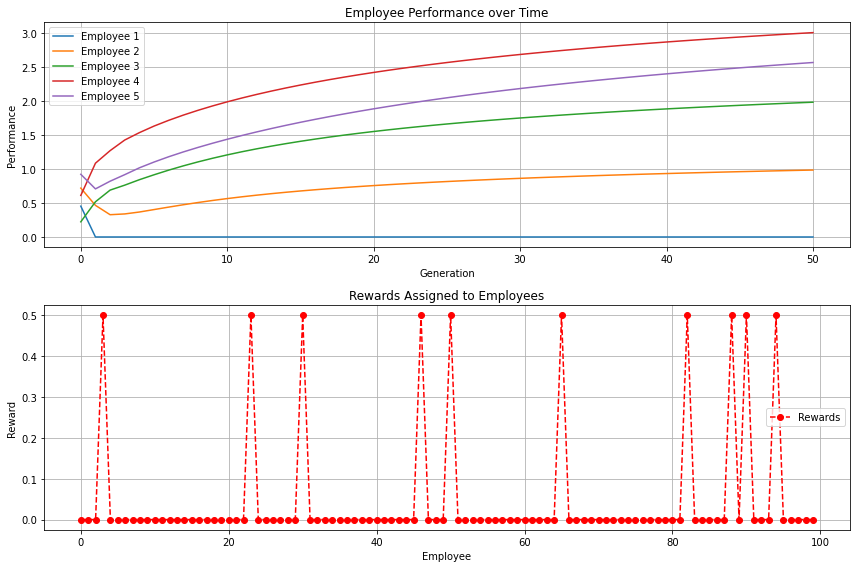

In [62]:
# Plot multiple graphs for performance parameters over time
plt.figure(figsize=(12, 8))

# Plot performance over time
plt.subplot(2, 1, 1)
for i in range(5):  # Plotting performance of 5 random employees
    plt.plot(range(num_generations + 1), [history[i] for history in performance_history], label=f'Employee {i+1}')
plt.xlabel('Generation')
plt.ylabel('Performance')
plt.title('Employee Performance over Time')
plt.legend()
plt.grid(True)

# Plot rewards over time
plt.subplot(2, 1, 2)
plt.plot(range(num_employees), rewards, label='Rewards', color='red', marker='o', linestyle='dashed')
plt.xlabel('Employee')
plt.ylabel('Reward')
plt.title('Rewards Assigned to Employees')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()